# Análisis de frecuencia

En esta práctica trabajaremos con el análisis de señales desde el dominio de la frecuencia. Corresponde al tema 3 de la teoría

## Señales continuas

### Series de Fourier

La mayor parte de las señales pueden descomponerse en una suma de componentes sinusoidales. Para señales períodicas en tiempo continuo esta descomposición se denomina **Serie de Fourier**.
Ejemplos de señales períodicas interesantes que podemos descomponer a través de la serie de Fourier son las señales cuadradas, rectangulares, triangulares, sinusoides y exponenciales complejas.

La representación en series de Fourier la podemos encontrar en *diferentes formas* pero al final son equivalentes. Típìcamente la podemos encontrar como una suma lineal ponderada de exponenciales complejas relacionadas armónicamente  pero también es habitual verla como una combinación lineal de senos y cosenos.




A nivel práctico, el análisis en frecuencia para señales en el dominio del tiempo  se realiza empleando un procesador digital de señales, que puede ser una computadora digital de propósito general o sobre un hardware especialmente diseñado. Esto tiene gran importancia porque requiere de una representación apropiada tanto para la entrada de datos  como para la salida, es decir, tratar con secuencias continuas (a la entrada o a la salida) no es lo más adecuado computacionalmente.

En el caso de las Series de Fourier nos encontramos que tenemos que procesar señales períodicas y continuas en el tiempo, una aproximación apropiada para este problema es trabajar con [Sympy](https://www.sympy.org/) que es una librería de matemática simbólica de Python.


### Series de Fourier - Sympy

Sympy proporciona una función para calcular las series de Fourier a través de la serie trigonométrica. 

Recordamos que la representación en forma de serie de senos y cosenos es: 


$\large x_p(t)= \frac{a_0}{2}+\sum\limits_{n=1}^{\infty}[a_n cos(2\pi n \frac{1}{T} t))+b_n sen(2\pi n \frac{1}{T} t)]$



Para el cáculo de los coeficientes:

$\large a_n=\frac{2}{T} \int_\frac{-T}{2}^\frac{T}{2} x_p(t) cos(2\pi n\frac{1}{T}t)~dt$



$\large b_n=\frac{2}{T} \int_\frac{-T}{2}^\frac{T}{2} x_p(t) sen(2\pi n\frac{1}{T}t)~dt$


<b>Nota</b>: Se integra en un período  de $x_p(t)$ como, por ejemplo, $0-T_{x}$.



Desde Sympy usaremos la función [fourier_series](https://docs.sympy.org/latest/modules/series/fourier.html#sympy.series.fourier.fourier_series).
La estructura básica es:
```python
from sympy import fourier_series
fourier_series(f, limits)
```

donde:

* **f**: representa la señal continua períodica. Nuestro $x_p(t)$ en las ecuaciones previas
* **limits**: representa una tripla (sym, start, end).
    * sym es el la variable (*símbolo*) respecto a la que desarrollamos la serie de Fourier. En nuestro caso representaría el tiempo y es la *t* en las ecuaciones previas
    * start y end son los límites de los intervalos del período sobre el que calculamos la serie




#### Ejemplo básico de uso

Calcular la serie de fourier sobre una señal "diente de sierra" [sawtooth_wave](https://en.wikipedia.org/wiki/Sawtooth_wave),  con período $2\pi$ $(-\pi, \pi)$

Para *atacar* estos problemas con Sympy tenemos primero que implementar la función que representaría el comportamiento de la señal en el período en el que la vamos a analizar (ej. $(-\pi, \pi)$). Esta señal tiene un comportamiento en forma de rampa durante el período y luego cae a cero de forma recta y vuelve a empezar. **Solo nos tenemos que preocupar de su comportamiento dentro de ese período**, es decir, del comportamiento de rampa. 


In [1]:
import matplotlib.pyplot as plt
from IPython.display import display
import sympy as sp
from sympy.abc import t #IMPORTANTE. Es necesario definir la variable simbólica
#Otras formas de crear símbolos
#x=sp.Symbol('x')
#x,y=sp.symbols("x y")
plt.rcParams["figure.figsize"] = (14,4) #dimensiones por defecto al plotear (width, height)

sp.init_printing()#Selecciona el mejor modo de impresión para sympy de los disponibles

#definimos la función con un comportamiento de rampa 
#Será la que usemos dentro del período
def f(t):
    return t

Establecemos los límites y creamos la representación de la serie a través de la función *fourier_series*

In [2]:
#Aquí establecemos los límites que se usarán y la variable simbólica que usaremos
#La variable coincide con la que usamos en la función
limits=(t, -sp.pi, sp.pi)
s = sp.fourier_series(f(t), limits)

#es una función tan sencilla que podríamos hacer todo en la misma línea, 
#ya que la función solo devuelve el propio valor
#s = fourier_series(t, (t, -pi, pi))



Una vez tenemos la representación podemos calcular los armónicos (ojo con esta parte porque es computacionalmente intensiva)

In [3]:
#obtenemos "n" armónicos
s1 = s.truncate(n=3) # 3 armónicos
display(s1) #display, en lugar de print, nos permite un output más "bonito". Requiere un from IPython.display import display
print(s1)
s2 = s.truncate(n = 5)# 5 armónicos
display(s2)
s3 = s.truncate(n = 30)# 10 armónicos
display(s3)


2*sin(t) - sin(2*t) + 2*sin(3*t)/3


Ahora podemos [plotear](https://docs.sympy.org/latest/modules/plotting.html#plotting-function-reference) los resultados para ver si conseguimos aproximar la secuencia en el dominio del tiempo con nuestra serie de Fourier.





<b>Nota</b>: La señal original se genera con la función que creamos en la que solo nos preocupamos de su comportamiento en el período, por lo que no se va a visualizar de forma periódica

###Start Info plot object###
Plot object containing:
[0]: cartesian line: t for t over (-10.0, 10.0)
[1]: cartesian line: 2*sin(t) - sin(2*t) + 2*sin(3*t)/3 for t over (-10.0, 10.0)
[2]: cartesian line: 2*sin(t) - sin(2*t) + 2*sin(3*t)/3 - sin(4*t)/2 + 2*sin(5*t)/5 for t over (-10.0, 10.0)
[3]: cartesian line: 2*sin(t) - sin(2*t) + 2*sin(3*t)/3 - sin(4*t)/2 + 2*sin(5*t)/5 - sin(6*t)/3 + 2*sin(7*t)/7 - sin(8*t)/4 + 2*sin(9*t)/9 - sin(10*t)/5 + 2*sin(11*t)/11 - sin(12*t)/6 + 2*sin(13*t)/13 - sin(14*t)/7 + 2*sin(15*t)/15 - sin(16*t)/8 + 2*sin(17*t)/17 - sin(18*t)/9 + 2*sin(19*t)/19 - sin(20*t)/10 + 2*sin(21*t)/21 - sin(22*t)/11 + 2*sin(23*t)/23 - sin(24*t)/12 + 2*sin(25*t)/25 - sin(26*t)/13 + 2*sin(27*t)/27 - sin(28*t)/14 + 2*sin(29*t)/29 - sin(30*t)/15 for t over (-10.0, 10.0)
###End Info plot object###


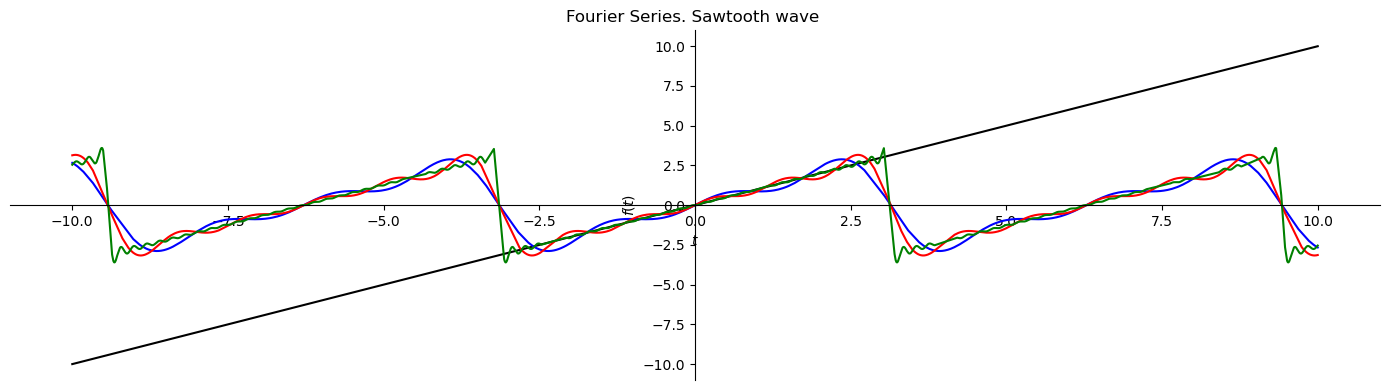

In [4]:
p=sp.plot(f(t),s1,s2,s3,(t,-10, 10), show=False, legend=False, title="Fourier Series. Sawtooth wave ")
#p=sp.plot(f(t),s1,s2,s3,(t,sp.pi, -sp.pi), show=False, legend=False) #Si solo quiero visualizar un período
print("###Start Info plot object###")
print(p)
print("###End Info plot object###")
p[0].line_color="black"
p[1].line_color="blue"
p[2].line_color="red"
p[3].line_color="green"
p.show()

Una vez creada la serie de fourier se pueden obtener sus coeficientes ($a_n$ y $b_n$)

Se puede acceder en forma de lista de la siguiente forma:
```python
s.a0
s.an
s.bn
```


$\large x_p(t)= \color{blue}{\frac{a_0}{2}}+\sum\limits_{n=1}^{\infty}[\color{blue}{a_n} cos(2\pi n \frac{1}{T} t))+\color{blue}{b_n} sen(2\pi n \frac{1}{T} t)]$


En nuestro caso, al ser una función impar, los $a_n$ (coeficientes del coseno) se anulan  y dan cero (lo podeis comprobar a mano)

Para obtener un coeficiente en concreto:

<code>s.bn.coeff(5)</code>

Para obtener el valor real necesitamos darle un valor a $t$ que convierta el seno/coseno en 1 (dependiendo si el coeficiente es $a_n$ o $b_n$) substituyendo con la función apropiada (*subs*) de Sympy. 

Ejemplo: para obtener el coeficiente $b_5$ necesitamos

<code> s.bn.coeff(5).subs(t, sp.pi/2 * 5)</code>

In [5]:
display(s.a0)
display(s.an)
display(s.bn)

display(s.bn.coeff(5))
display(s.bn.coeff(5).subs(t, sp.pi/2 * 5))

#Este paso lo podríamos automatizar para todos los coeficientes 
#creando un array a través de "list  Comprehension"
#Con el for recorro todos los índices (idx) para los coeficientes "b" que me interesan
# en cada vuelta uso el valor de idx para solicitar el coeficiente y a la vez simplificar
#con el subs. En la simplificación busco el sin(pi/2). Fijaos que en la forma sin simplificar
#siempre aparece algo del tipo sin(idx*t) por lo tanto yo busco sustituir t por (pi/(2*idx))

#coefb=[s.bn.coeff(idx).subs(t, sp.pi/(2 * idx)) for idx in range(1,10)]
#print(coefb)

Obviamente esto lo podríamos hacer también a base de las fórmulas dadas para los coeficientes.

### Ejercicio
Para practicar con Sympy <b>implementar las funciones para calcular $a_n$ y $b_n$ </b> partiendo de las siguiente cabeceras:

```python
def an(n,f, limits):
    #resto del código
```
   

```python
def bn(n,f, limits):
    #resto del código
```

```python
#Ejemplo para llamar a las funciones creadas
limits=(t, -sp.pi, sp.pi)
display(bn(5, f(t), limits))

```

$\large a_n=\frac{2}{T} \int_\frac{-T}{2}^\frac{T}{2} x_p(t) cos(2\pi n\frac{1}{T}t)~dt$



$\large b_n=\frac{2}{T} \int_\frac{-T}{2}^\frac{T}{2} x_p(t) sen(2\pi n\frac{1}{T}t)~dt$


Para realizar una [integral](https://docs.sympy.org/latest/tutorial/calculus.html#integrals) en Sympy 

In [6]:
#limits es una tupla de 3 elementos con la forma que usa siempre sympy para estos casos 
def an(n,f, limits):
    T=limits[2]-limits[1] #Restanto el límite superior de la integral por el inferior obtengo el período
    F0=1/T #La frecuencia es la inversa del período
    pi2f=2*sp.pi*F0 #Esto no es necesario, es solo por facilitarme las cosas
    rdo=(2/T)*sp.integrate(f*sp.cos(pi2f*n*limits[0]), limits)#limits[0] tiene la variable simbólica (ej. t)
    return rdo

def bn(n,f, limits):
    T=limits[2]-limits[1]
    f0=1/T
    pi2f=2*sp.pi*(1/T)
    rdo=(2/T)*sp.integrate(f*sp.sin(pi2f*n*limits[0]), limits)
    return rdo


#Las funciones son objetos y si os fijais an y bn solo cambian en aplicar sin o cos por lo que podría
#desarrollar una sola función que almacenase en una variable la función que quiero usar

#def calcular_coeff(n,f, limits, an=True):
    ###Si an==True entonces genero an si an==False genero bn. 
#    T=limits[2]-limits[1]
#    f0=1/T
#    pi2f=2*sp.pi*(1/T)
#    fun=sp.cos if an else sp.sin
#    rdo=(2/T)*sp.integrate(f*fun(pi2f*n*limits[0]), limits)
#    return rdo
    
    
    



In [7]:
limits=(t, -sp.pi, sp.pi)
def f(t):
    return t

#an y bn solo devuelven 1 coeficiente
#empleando list  comprehension podemos crear todos los que queramos
#básicamente llamamos a nuestra función en cada vuelta del for
#y creamos un array con sus resultados
coefan=[an(i, f(t), limits)for i in range (1,10)]
coefbn=[bn(i, f(t), limits)for i in range (1,10)]


#zip nos permite generar listas de tuplas cruzando los elementos de varias listas
#originales. Ej. zip([1,2,3],[a,b,c]) genera [(1,a), (2,b), (3,c)] muy útil para hacer operaciones
#en las que tenemos que emplear elementos de varias listas que están en la misma posición.
#Si las listas son de tamaño diferente, las une hasta los elementos comunes
fase=[ sp.atan(b/a) for a,b in zip(coefan,coefbn)]#podemos calcular la fase 

print(coefan)
print(coefbn)
print(fase)

#Versión empleando una sola función
#coefbn2=[calcular_coeff(i, f(t), limits,an=False)for i in range (1,10)]
#coefan2=[calcular_coeff(i, f(t), limits)for i in range (1,10)]
#print(coefbn2)
#print(coefan2)


[0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, -1, 2/3, -1/2, 2/5, -1/3, 2/7, -1/4, 2/9]
[AccumBounds(-pi/2, pi/2), AccumBounds(-pi/2, pi/2), AccumBounds(-pi/2, pi/2), AccumBounds(-pi/2, pi/2), AccumBounds(-pi/2, pi/2), AccumBounds(-pi/2, pi/2), AccumBounds(-pi/2, pi/2), AccumBounds(-pi/2, pi/2), AccumBounds(-pi/2, pi/2)]


### Ejercicio

Desarrollar la serie de fourier para una sinusoide rectificada de la forma:

![Secuencia cuadrada](secuencia_rectificada.png)


-20*cos(2*t)/(3*pi) - 4*cos(4*t)/(3*pi) + 10/pi


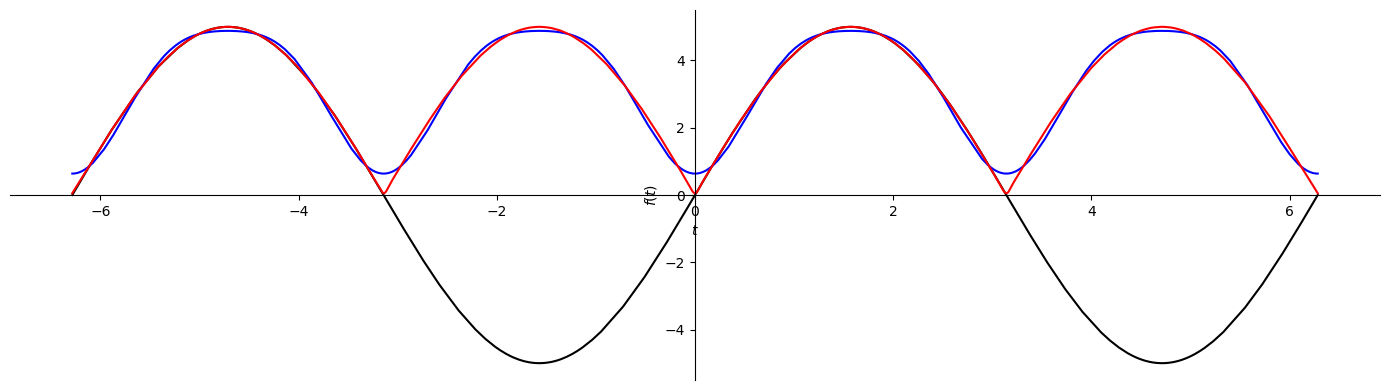

In [8]:


#Esta función solo nos debe de preocupar que represente el comportamiento de la función
#continua dentro del período
#Fijaos en el dibujo que tiene una A=5
def f(t):
    return 5*sp.sin(t)


lima=0
limb=sp.pi
limits=(t,lima,limb)

s = sp.fourier_series(f(t), limits)
#obtenemos "n" armónicos
s1 = s.truncate(n=3) # 3 armónicos
display(s1) #display, en lugar de print, nos permite un output más "bonito". Requiere un from IPython.display import display
print(s1)
s2 = s.truncate(n = 30)
#display(s2)
    
p=sp.plot( f(t),s1,s2, (t, -2*sp.pi,2*sp.pi, ), show=False, legend=False)


p[0].line_color="black"
p[1].line_color="blue"
p[2].line_color="red"


p.show()


### Ejercicio

Desarrollar la serie de fourier para una señal cuadrada de la forma:

![Secuencia cuadrada](secuencia_cuadrada.png)


**Notas importantes**
* Para emplear el símbolo $\pi$ debéis de usar la variable pi de Sympy (**no vale la de Numpy**)
* Para condicionales en las funciones que van a tratar con variables simbólicas debéis de usar y devolver un objeto  [Piecewise](https://docs.sympy.org/latest/modules/functions/elementary.html#piecewise)
    * Los operadores lógicos (AND, OR) tienen su equivalente en Sympy (ej. sp.And(exp1,expr2))
    
* Las operaciones matemáticas tipo *abs* tienen su equivalente en Sympy (ej. sp.Abs())


4*cos(t)/pi - 4*cos(3*t)/(3*pi) + 4*cos(5*t)/(5*pi) - 4*cos(7*t)/(7*pi) + 4*cos(9*t)/(9*pi) - 4*cos(11*t)/(11*pi) + 4*cos(13*t)/(13*pi) - 4*cos(15*t)/(15*pi) + 4*cos(17*t)/(17*pi) - 4*cos(19*t)/(19*pi) + 4*cos(21*t)/(21*pi) - 4*cos(23*t)/(23*pi) + 4*cos(25*t)/(25*pi) - 4*cos(27*t)/(27*pi) + 4*cos(29*t)/(29*pi) - 4*cos(31*t)/(31*pi) + 4*cos(33*t)/(33*pi) - 4*cos(35*t)/(35*pi) + 4*cos(37*t)/(37*pi) - 4*cos(39*t)/(39*pi) + 4*cos(41*t)/(41*pi) - 4*cos(43*t)/(43*pi) + 4*cos(45*t)/(45*pi) - 4*cos(47*t)/(47*pi) + 4*cos(49*t)/(49*pi) - 4*cos(51*t)/(51*pi) + 4*cos(53*t)/(53*pi) - 4*cos(55*t)/(55*pi) + 4*cos(57*t)/(57*pi) - 4*cos(59*t)/(59*pi)


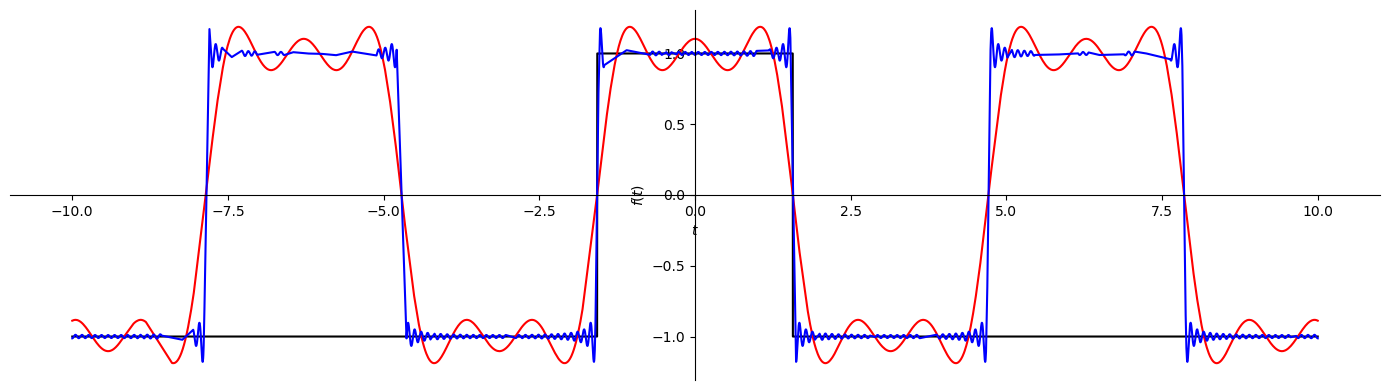

In [9]:

t,x,a=sp.symbols("t x a")


#definimos la función pensando en su comportamiento en un solo período
def f(t):  
    #return sp.Piecewise((1, sp.Abs(t)<=sp.pi/2),(-1, sp.And(t>pi/2, t<3*sp.pi/2)), (0, True))
    #Nos llega con una estructura IF-ELSE, ya que solo tenemos que tener en cuenta el período
    return sp.Piecewise((1, sp.Abs(t)<=sp.pi/2),(-1, True))



#OJO con los límites del período. Tenés que tener en cuenta la parte "1" y la "-1"
lima=-sp.pi/2
limb=3* sp.pi/2
limits=(t,lima,limb)


#calculamos la serie de fourier
s = sp.fourier_series(f(t), limits)

#obtenemos "n" armónicos
s1 = s.truncate(n=3)
s2 = s.truncate(n = 30)
print(s2)


p=sp.plot(f(t),s1, s2,(t,-10, 10), show=False, legend=False)
p[0].line_color="black"
p[1].line_color="red"
p[2].line_color="blue"
p.show()

En la teoría hemos visto las series de Fourier como una serie de exponenciales complejas. Vamos a realizar la implementación en base a dicha serie
### Ejercicio. 
* Desarrollad la Serie de Fourier <b>a través de exponenciales complejas</b> y calculad dicha serie para la señal cuadrada vista anteriormente
    * Cread 10 armónicos ($c_n: range(-10,11)$). Esto es muy costoso computacionalmente. Si no "puede", bajadlo a 5
* Calculad y visualizad el espectro de densidad de potencia
* Calculad y visualizad el espectro del módulo de los coeficientes

Para desarrollar la serie emplearemos Sympy. Recordamos las ecuaciones


<b>Ecuación de síntesis</b>

$\large x(t)=\sum\limits_{n=-\infty}^{\infty}c_n e^{j2\pi nF_0t}$


<b>Ecuación de análisis </b>

$\large  c_n= \frac{1}{T} \int_T x_p(t)e^{-j2\pi nF_0 t} dt$


<b>Notas</b>

* Sympy tiene una constante para el número imaginario *sympy.I*
* Para la parte exponencial tenemos sympy.exp()


![Secuencia cuadrada](secuencia_cuadrada.png)



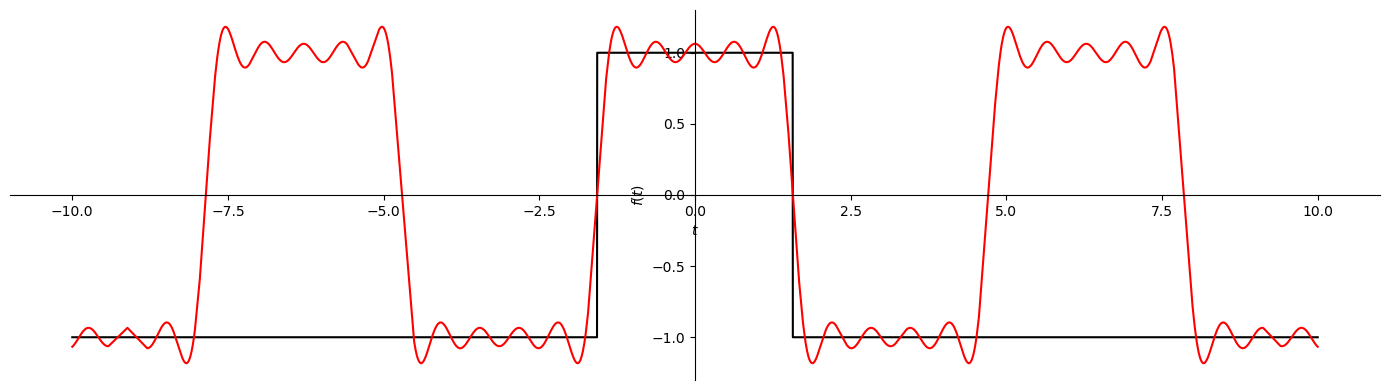

In [10]:


k,t,p,y=sp.symbols( "k t p y")

#definimos la función
def f(t):  
    return sp.Piecewise((1, sp.Abs(t)<=sp.pi/2), (-1, True))


#Calculo los coeficientes de Fourier con exponenciales complejas
#Es la misma idea que con la serie trigonométrica
#OJO con el símbolo "j" de imaginario. Con Sympy se hace con
#sp.I
def cn(n, f, limits):
    T=limits[2]-limits[1]
    j2pif=-1*sp.I*2*sp.pi*(1/T)
    rdo=(1/T)*sp.integrate(f*sp.exp(j2pif*n*limits[0]), limits)
 
    return rdo

#La función crea un elemento de la serie. La suma -oo  +oo de la serie es la representación
#en el dominio de la frecuencia de la secuencia original en el dominio del tiempo

def serie_elemento(n, f, limits):
    T=limits[2]-limits[1]
    j2pif=sp.I*2*sp.pi*(1/T)
    return cn(n,f,limits)*sp.exp(j2pif*n*limits[0])



#Creo la serie basada en exponeciales complejas
def S(N,f, limits):

    #creo un array con todos los elementos de la serie que me interesa
    #Recordad que para hacer los armónicos de la serie trigonométrica
    #necesito la parte negativa y la positiva
    #Una vez tengo el array, que lo creo con list  comprehension, luego simplemente los sumo
    return sum( [serie_elemento(n,f,limits) for n in range(-N, N+1)])
       
        
        



lima=-sp.pi/2
limb=3* sp.pi/2
limits=(t,lima,limb)
armonicos=10

s=S(armonicos,f(t),limits)#ojo que esto es computacionalmente costoso. Si lleva mucho tiempo poner menos armónicos
display(s)
p=sp.plot(f(t),s,(t,-10, 10), show=False, legend=False)

p[0].line_color="black"
p[1].line_color="red"
p.show()




In [11]:
#Obtengo los coeficientes
coeficientes=[cn(i, f(t), limits) for i in range(-armonicos,armonicos+1)]#ojo que es costoso computacionalmente



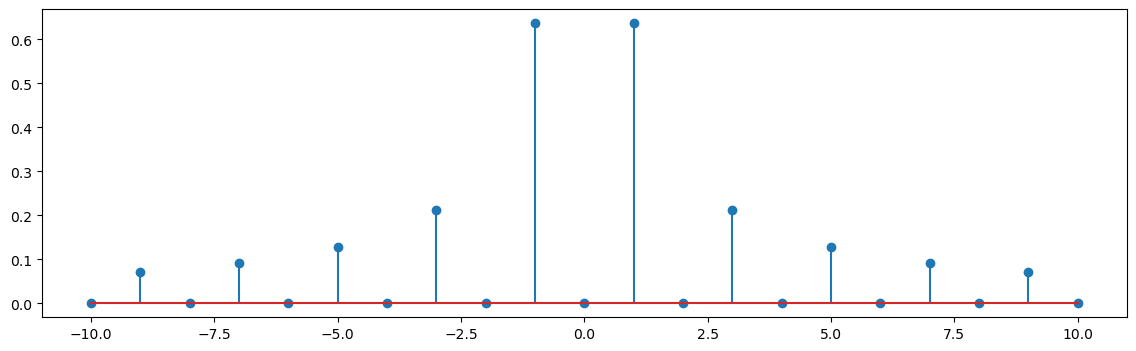

<StemContainer object of 3 artists>

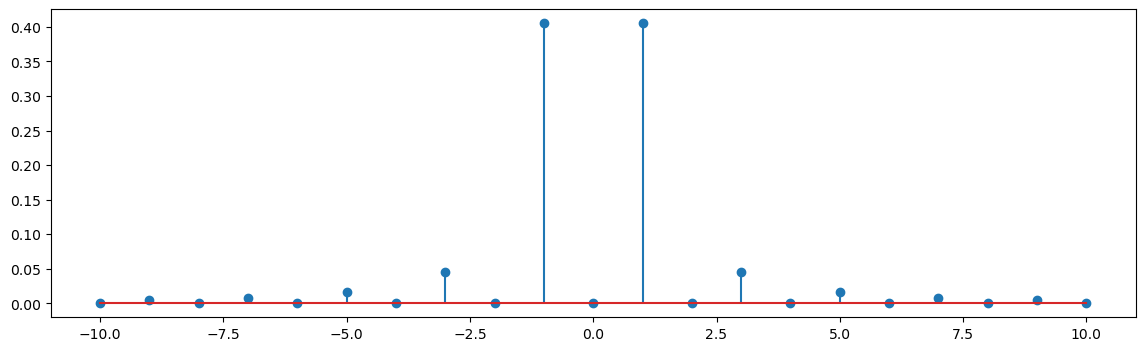

In [12]:
display(coeficientes)


plt.stem(range(-armonicos,armonicos+1), [ abs(ck) for ck in coeficientes])#espectro de módulo. Son valores reales
plt.show()
plt.stem(range(-10,11), [ abs(ck)**2 for ck in coeficientes])#espectro de densidad. Son valores reales